In [1]:
from functions import *

In [2]:
df1 = pd.read_csv('estm_v1_test_results.csv')
df1['model'] = [item[34:] for item in df1['model']]
df1 = df1.set_index('model')
df2 = pd.read_csv('estm_v2_test_results.csv')
df2['model'] = [item[32:] for item in df2['model']]
df2 = df2.set_index('model')

In [3]:
hyperparam1 = {
    'estm_model_2023_03_21_v4.h5': (20, 0.25),
    'estm_model_2023_03_21_v5.h5': (20, 0.5),
    'estm_model_2023_03_21_v6.h5': (20, 0.75),
    'estm_model_2023_03_21_v7.h5': (20, 1.),
    'estm_model_2023_03_21_v8.h5': (20, 1.25),
    'estm_model_2023_03_21_v9.h5': (20, 1.5),
    'estm_model_2023_03_21_v10.h5': (24, 0.25),
    'estm_model_2023_03_21_v11.h5': (24, 0.5),
    'estm_model_2023_03_21_v12.h5': (24, 0.75),
    'estm_model_2023_03_21_v13.h5': (24, 1.),
    'estm_model_2023_03_21_v14.h5': (24, 1.25),
    'estm_model_2023_03_22_v0.h5': (24, 1.5)
}
hyperparam1_df = pd.DataFrame(
    hyperparam1.values(), 
    columns=['latent_dim', 'beta'], 
    index=hyperparam1.keys()
)
df1 = df1.join(hyperparam1_df, how='inner')

In [4]:
model_list = glob('estm_v2_grid/*.h5')
hyperparam2 = {}
for i in range(len(model_list)):
    path = model_list[i][13:]
    beta_e, latent_dim, beta = path.split('_')[-3:]
    beta_e = float(beta_e)
    latent_dim = int(latent_dim)
    beta = float(beta[:-3])
    
    hyperparam2[path] = (latent_dim, beta, beta_e)
hyperparam2_df = pd.DataFrame(
    hyperparam2.values(), 
    columns=['latent_dim', 'beta', 'beta_e'], 
    index=hyperparam2.keys()
)
df2 = df2.join(hyperparam2_df, how='inner')

In [5]:
betas = [0.25*i for i in range(1, 7)]

## ESTM-1

In [6]:
df20 = df1.loc[df1['latent_dim'] == 20]\
.sort_values('beta')\
.drop(columns=['latent_dim', 'beta'], errors='ignore')

df24 = df1.loc[df1['latent_dim'] == 24]\
.sort_values('beta')\
.drop(columns=['latent_dim', 'beta'], errors='ignore')

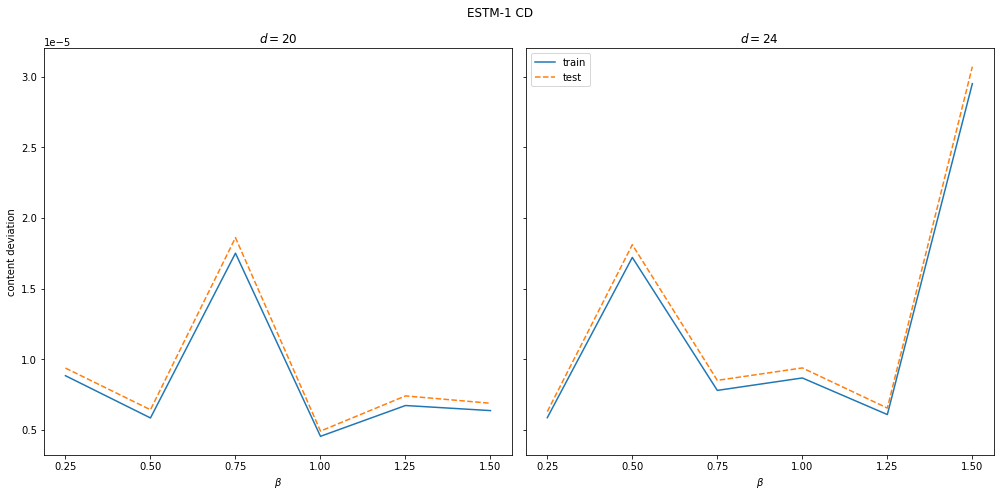

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14, 7))
ax[0].plot(betas, df20['train_content_dev'], linestyle='-')
ax[0].plot(betas, df20['test_content_dev'], linestyle='--')
ax[0].set_title(r'$d=20$')
ax[0].set_xlabel(r'$\beta$')
ax[0].set_ylabel('content deviation')
ax[0].set_xticks(betas)
ax[1].plot(betas, df24['train_content_dev'], linestyle='-')
ax[1].plot(betas, df24['test_content_dev'], linestyle='--')
ax[1].set_title(r'$d=24$')
ax[1].set_xlabel(r'$\beta$')
ax[1].set_xticks(betas)
ax[1].legend(['train', 'test'])
plt.suptitle('ESTM-1 CD')
plt.tight_layout()

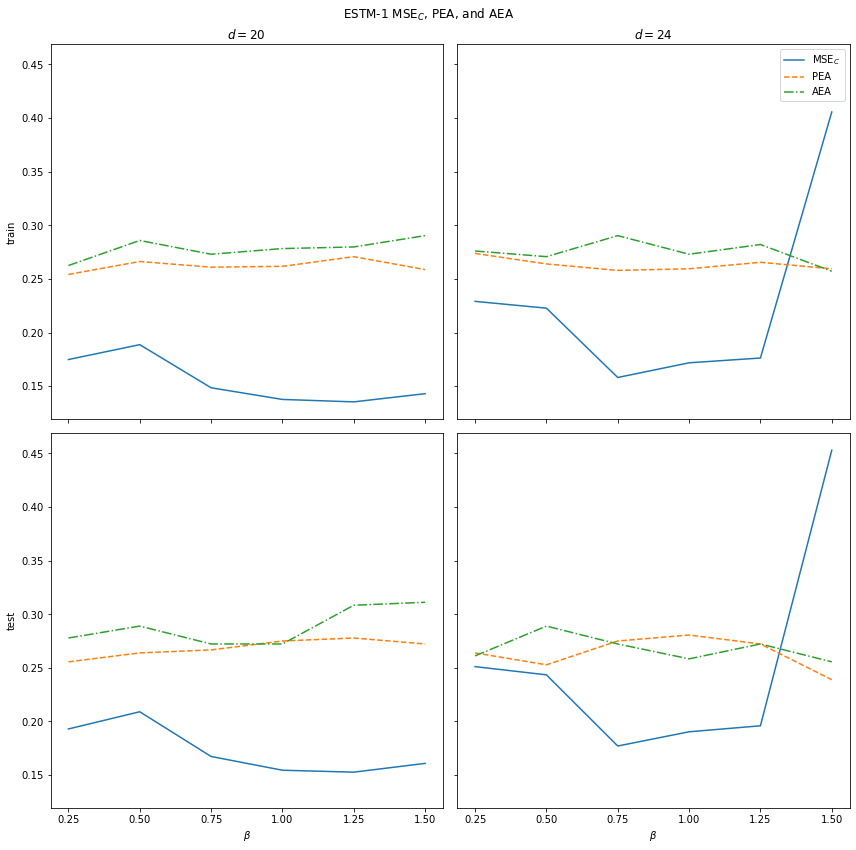

In [8]:
df20 = df20.drop(columns=['train_content_dev', 'test_content_dev'], errors='ignore')
df24 = df24.drop(columns=['train_content_dev', 'test_content_dev'], errors='ignore')
fig, ax = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True, figsize=(12, 12))
for col in df20.columns:
    if col.endswith('recon'):
        linestyle = '-'
    elif col.endswith('pred_emotion'):
        linestyle = '--'
    else:
        linestyle = '-.'
    
    if col.startswith('train'):
        ax[0, 0].plot(betas, df20[col], linestyle=linestyle)
        ax[0, 1].plot(betas, df24[col], linestyle=linestyle)
    else:
        ax[1, 0].plot(betas, df20[col], linestyle=linestyle)
        ax[1, 1].plot(betas, df24[col], linestyle=linestyle)
for i in [0, 1]:
    for j in [0, 1]:
        ax[i, j].set_xticks(betas)
ax[0, 1].legend(['MSE$_C$', 'PEA', 'AEA'])
ax[1, 0].set_xlabel(r'$\beta$')
ax[1, 1].set_xlabel(r'$\beta$')
ax[0, 0].set_ylabel('train')
ax[1, 0].set_ylabel('test')
ax[0, 0].set_title(r'$d=20$')
ax[0, 1].set_title(r'$d=24$')
plt.suptitle('ESTM-1 MSE$_C$, PEA, and AEA')
plt.tight_layout()

## ESTM-2

In [9]:
df20 = df2.loc[df2['latent_dim'] == 20]\
.sort_values(['beta_e', 'beta'])\
.drop(columns=['latent_dim', 'beta'], errors='ignore')

df24 = df2.loc[df2['latent_dim'] == 24]\
.sort_values(['beta_e', 'beta'])\
.drop(columns=['latent_dim', 'beta'], errors='ignore')

In [10]:
beta_es = [0.25, 0.75, 1.25]

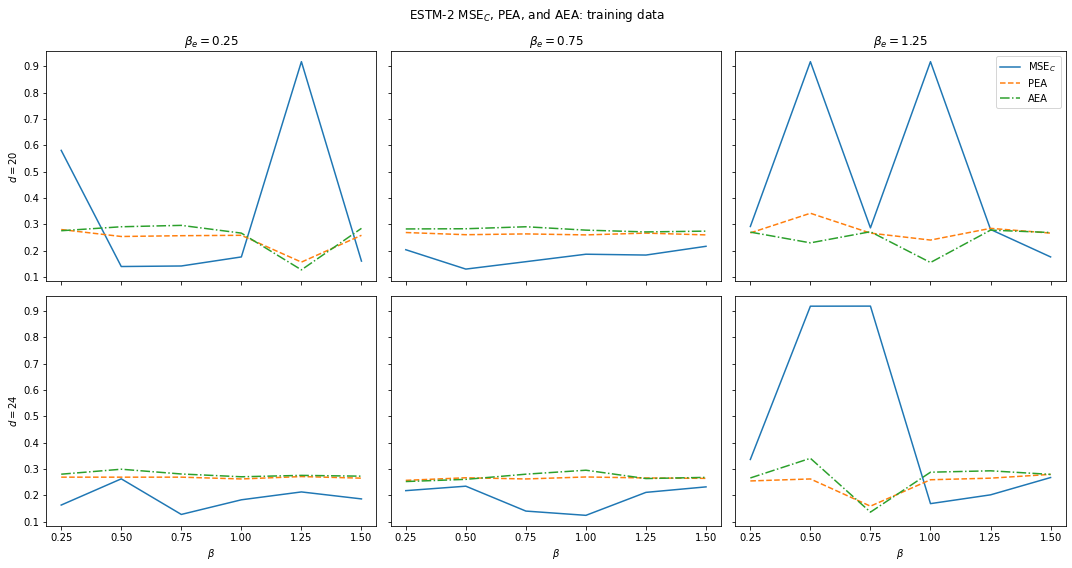

In [11]:
df20 = df20.drop(columns=['train_content_dev', 'test_content_dev'], errors='ignore')
df24 = df24.drop(columns=['train_content_dev', 'test_content_dev'], errors='ignore')
fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True, figsize=(15, 8))
for i, beta_e in enumerate(beta_es):
    subset20 = df20[df20['beta_e'] == beta_e]
    subset24 = df24[df24['beta_e'] == beta_e]
    
    ax[0, i].plot(betas, subset20['train_recon'], linestyle='-')
    ax[0, i].plot(betas, subset20['train_pred_emotion'], linestyle='--')
    ax[0, i].plot(betas, subset20['train_true_emotion'], linestyle='-.')
    ax[0, i].set_title(f'$\\beta_e={beta_e}$')
    
    ax[1, i].plot(betas, subset24['train_recon'], linestyle='-')
    ax[1, i].plot(betas, subset24['train_pred_emotion'], linestyle='--')
    ax[1, i].plot(betas, subset24['train_true_emotion'], linestyle='-.')

for i in [0, 1]:
    for j in [0, 1, 2]:
        ax[i, j].set_xticks(betas)
        ax[1, j].set_xlabel(r'$\beta$')
ax[0, 0].set_ylabel('$d=20$')
ax[1, 0].set_ylabel('$d=24$')
ax[0, -1].legend(['MSE$_C$', 'PEA', 'AEA'])
plt.suptitle('ESTM-2 MSE$_C$, PEA, and AEA: training data')
plt.tight_layout()

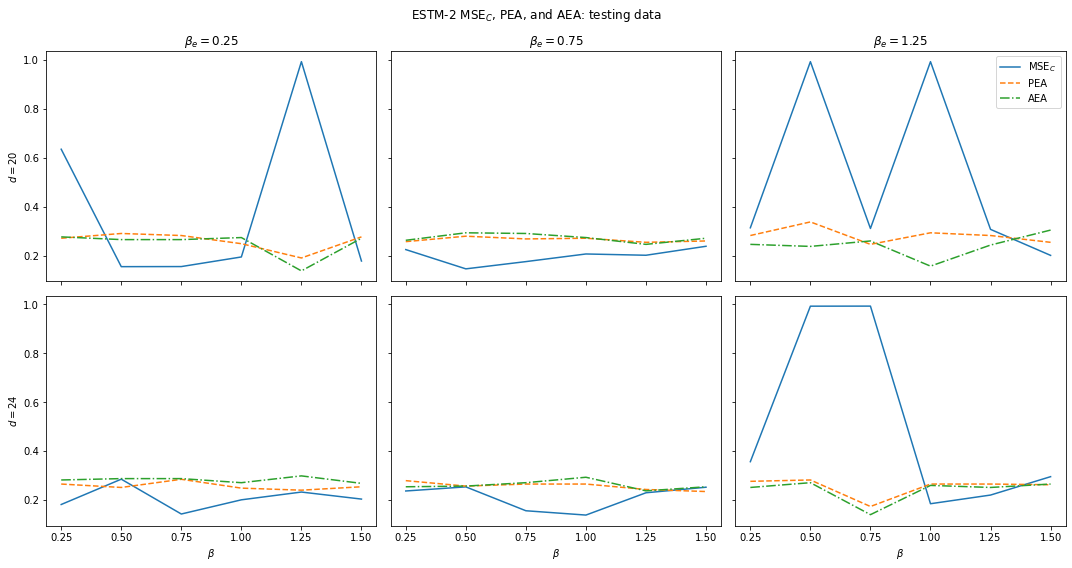

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True, figsize=(15, 8))
for i, beta_e in enumerate(beta_es):
    subset20 = df20[df20['beta_e'] == beta_e]
    subset24 = df24[df24['beta_e'] == beta_e]
    
    ax[0, i].plot(betas, subset20['test_recon'], linestyle='-')
    ax[0, i].plot(betas, subset20['test_pred_emotion'], linestyle='--')
    ax[0, i].plot(betas, subset20['test_true_emotion'], linestyle='-.')
    ax[0, i].set_title(f'$\\beta_e={beta_e}$')
    
    ax[1, i].plot(betas, subset24['test_recon'], linestyle='-')
    ax[1, i].plot(betas, subset24['test_pred_emotion'], linestyle='--')
    ax[1, i].plot(betas, subset24['test_true_emotion'], linestyle='-.')

for i in [0, 1]:
    for j in [0, 1, 2]:
        ax[i, j].set_xticks(betas)
        ax[1, j].set_xlabel(r'$\beta$')
ax[0, 0].set_ylabel('$d=20$')
ax[1, 0].set_ylabel('$d=24$')
ax[0, -1].legend(['MSE$_C$', 'PEA', 'AEA'])
plt.suptitle('ESTM-2 MSE$_C$, PEA, and AEA: testing data')
plt.tight_layout()

In [26]:
df2[[
    'train_pred_emotion',
    'test_pred_emotion'
]]

,train_pred_emotion,test_pred_emotion
estm2_1.25_20_1.5.h5,0.266968,0.255556
estm2_0.25_20_0.5.h5,0.254148,0.291667
estm2_0.25_20_0.25.h5,0.280543,0.272222
estm2_0.75_24_1.5.h5,0.263952,0.236111
estm2_0.25_24_1.0.h5,0.261689,0.250000
estm2_1.25_24_1.5.h5,0.279035,0.263889
estm2_0.25_20_1.25.h5,0.156863,0.191667
estm2_0.75_20_0.25.h5,0.269231,0.258333
estm2_0.75_20_0.5.h5,0.260935,0.280556
estm2_1.25_20_0.5.h5,0.342383,0.338889


## Comparison

In [13]:
df = pd.concat([df1, df2]).sort_values(['latent_dim', 'beta'])

In [14]:
metric_dict = {
    'recon': 'MSE$_C$', 
    'pred_emotion': 'PEA', 
    'true_emotion': 'AEA'
}

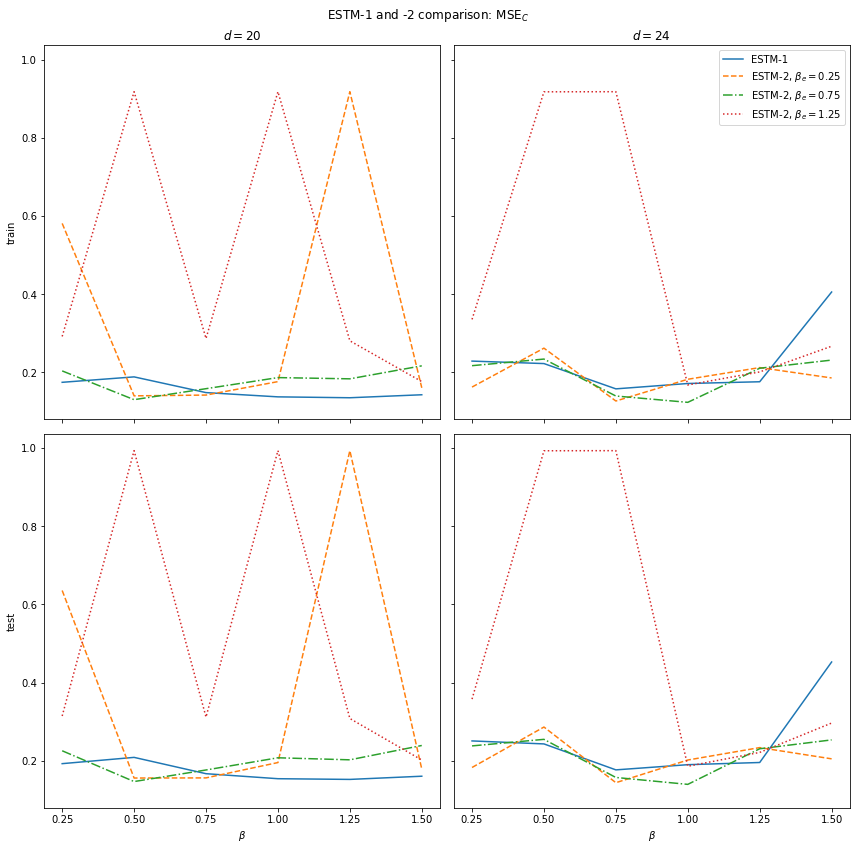

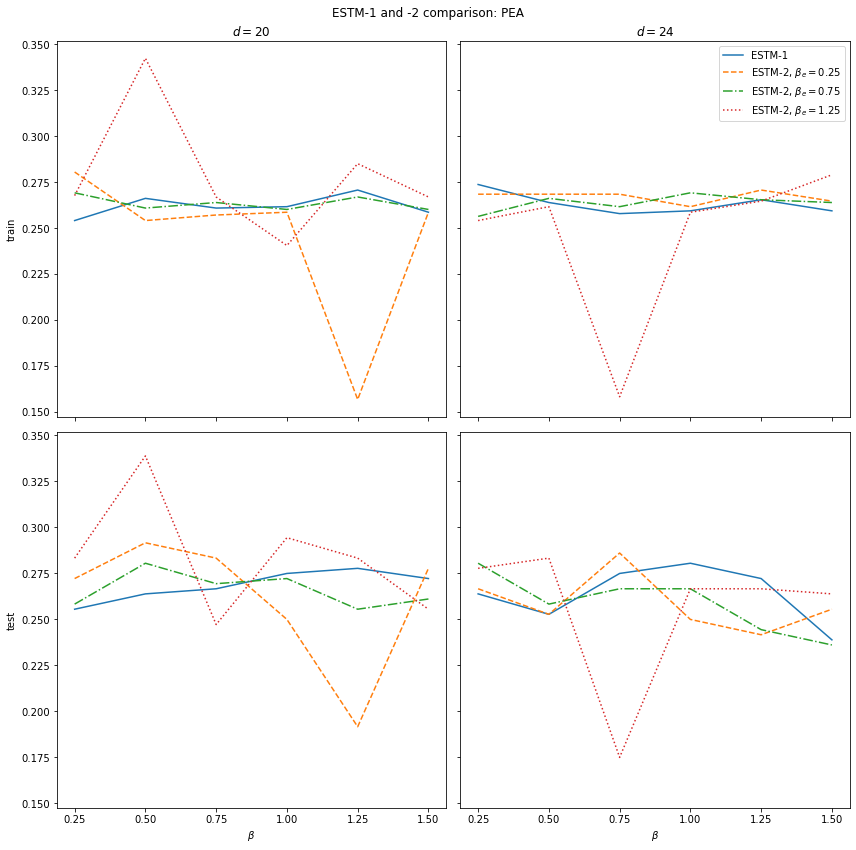

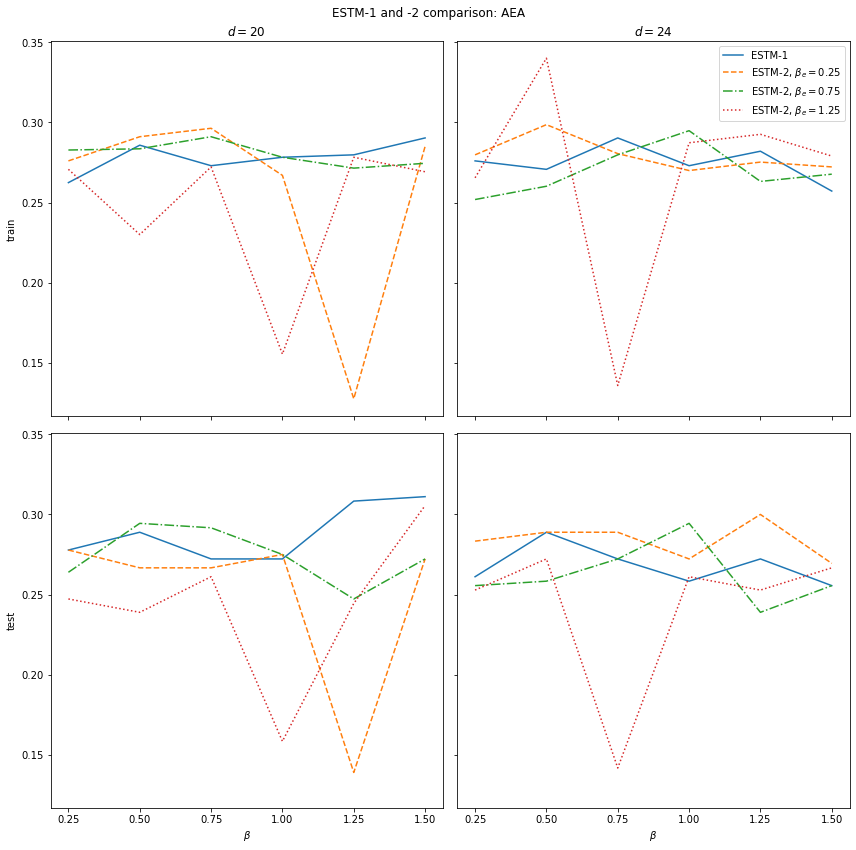

In [15]:
subset20 = df[df['latent_dim'] == 20]
subset24 = df[df['latent_dim'] == 24]
for metric in metric_dict.keys():
    fig, ax = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True, figsize=(12, 12))
    cols = df.columns[df.columns.str.endswith(metric)]
    for col in cols:
        if col.startswith('train'):
            i = 0
        else:
            i = 1
            
        linestyles = ['--', '-.', ':']
        
        subset = subset20[subset20['beta_e'].isna()]
        ax[i, 0].plot(betas, subset[col], linestyle='-')
        
        for beta_e, linestyle in zip(beta_es, linestyles):
            subset = subset20[subset20['beta_e'] == beta_e]
            ax[i, 0].plot(betas, subset[col], linestyle=linestyle)
            
        subset = subset24[subset24['beta_e'].isna()]
        ax[i, 1].plot(betas, subset[col])
        
        for beta_e, linestyle in zip(beta_es, linestyles):
            subset = subset24[subset24['beta_e'] == beta_e]
            ax[i, 1].plot(betas, subset[col], linestyle=linestyle)
        
    for i in [0, 1]:
        for j in [0, 1]:
            ax[i, j].set_xticks(betas)
    ax[1, 0].set_xlabel(r'$\beta$')
    ax[1, 1].set_xlabel(r'$\beta$')
    ax[0, 0].set_ylabel('train')
    ax[1, 0].set_ylabel('test')
    ax[0, 0].set_title(r'$d=20$')
    ax[0, 1].set_title(r'$d=24$')
    ax[0, 1].legend(
        [
            'ESTM-1', 
            r'ESTM-2, $\beta_e=0.25$', 
            r'ESTM-2, $\beta_e=0.75$',
            r'ESTM-2, $\beta_e=1.25$' 
        ]
    )
    plt.suptitle(f'ESTM-1 and -2 comparison: {metric_dict[metric]}')
    plt.tight_layout()

## Latex tables

In [21]:
tables = []
for name in ['train1', 'test1', 'train2', 'test2']:
    sheet = pd.read_excel('metrics.xlsx', sheet_name=name)
    if 'CD' in sheet.columns:
        sheet['CD'] = sheet['CD']*10**5
    latex_code = sheet.to_latex(float_format="%.3f", index=False)
    latex_code = latex_code.replace("\\\n", "\\ \hline\n")
    for i in [0.25, 0.5, 0.75, 1, 1.25, 1.5]:
        n = len(str(i))
        string = str(i) + (5 - n)*'0'
        if i == 1:
            string = '1.000'
        latex_code = latex_code.replace(string, str(i))
    print(latex_code)

C:\Users\bradl\AppData\Local\Temp\ipykernel_5796\1167853915.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = sheet.to_latex(float_format="%.3f", index=False)
C:\Users\bradl\AppData\Local\Temp\ipykernel_5796\1167853915.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = sheet.to_latex(float_format="%.3f", index=False)


\begin{tabular}{rrrrrr}
\toprule
 \$d\$ &  \$\textbackslash beta\$ &  \$\textbackslash text\{MER\}\_C\$ &   PEA &   AEA &    CD \\ \hline
\midrule
  20 &    0.25 &           0.175 & 0.254 & 0.262 & 0.883 \\ \hline
  20 &    0.5 &           0.189 & 0.266 & 0.286 & 0.584 \\ \hline
  20 &    0.75 &           0.148 & 0.261 & 0.273 & 1.750 \\ \hline
  20 &    1 &           0.138 & 0.262 & 0.278 & 0.454 \\ \hline
  20 &    1.25 &           0.135 & 0.271 & 0.280 & 0.672 \\ \hline
  20 &    1.5 &           0.143 & 0.259 & 0.290 & 0.636 \\ \hline
  24 &    0.25 &           0.229 & 0.274 & 0.276 & 0.586 \\ \hline
  24 &    0.5 &           0.223 & 0.264 & 0.271 & 1.720 \\ \hline
  24 &    0.75 &           0.158 & 0.258 & 0.290 & 0.779 \\ \hline
  24 &    1 &           0.172 & 0.259 & 0.273 & 0.867 \\ \hline
  24 &    1.25 &           0.176 & 0.265 & 0.282 & 0.608 \\ \hline
  24 &    1.5 &           0.406 & 0.259 & 0.257 & 2.950 \\ \hline
\bottomrule
\end{tabular}

\begin{tabular}{rrrrrr}
\toprule

C:\Users\bradl\AppData\Local\Temp\ipykernel_5796\1167853915.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = sheet.to_latex(float_format="%.3f", index=False)
C:\Users\bradl\AppData\Local\Temp\ipykernel_5796\1167853915.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = sheet.to_latex(float_format="%.3f", index=False)
